<a href="https://colab.research.google.com/github/gtbnhyujmj2003/Aidea-AOI/blob/master/%5BAidea%5D%5BAOI%5D%5B08%5D%20InceptionV3%20-%20%5Blr%20%3D%200.000001%5D%5Bsize%20%3D%20299%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
# 因為圖片實在太多，所以要用壓縮檔載入

import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/train_images.zip")
f.extractall("./datasets")

In [3]:
# 創造資料夾

import os

for class_num in range(6):
  DATASET_PATH_TRAIN = '/content/train_images/'
  DATASET_PATH_TEST = '/content/test_images/'

  # exist_ok：只有在目录不存在时创建目录，目录已存在时不会抛出异常。
  os.makedirs(DATASET_PATH_TRAIN + str(class_num), exist_ok=True)
  os.makedirs(DATASET_PATH_TEST + "test", exist_ok=True)

In [4]:
# 設計函數

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import cv2

# Preprocessed numpy.array or a tf.Tensor with type float32.
# The inputs pixel values are scaled between -1 and 1, sample-wise.

def IMG_InceptionV3_preprocessed (Paths, AnswerCSV):
  # folderName and fileName
  
  ImageAnswer = AnswerCSV

  AA = Paths.split("/")[-1]
  BB = ImageAnswer[ImageAnswer["ID"] == AA]["Label"]
  ID = BB.values[0]

  fileName = AA
  folderName = ID
  
  # 圖片用InceptionV3預處理
  img = load_img(Paths)
  img_npm = np.array(img)
  img_pre = preprocess_input(img_npm)
  IMGED = np.array(img_pre)

  # 存檔
  NewPaths = "/content/train_images/" + str(folderName) + "/" + str(fileName)
  cv2.imwrite(NewPaths, IMGED)

In [5]:
import pandas as pd
from glob import glob

Paths = glob('/content/datasets/train_images/*')
AnswerCSV = pd.read_csv("./drive/My Drive/AOI/train.csv")

for Paths in Paths:
  IMG_InceptionV3_preprocessed(Paths, AnswerCSV)

In [6]:
# Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
Generator = ImageDataGenerator(rescale= 1. ,
                               validation_split= 0.2)

In [7]:
TrainFlowGenerator = Generator.flow_from_directory(
    directory= "/content/train_images/",
    target_size= (299, 299),
    class_mode= "sparse", 
    subset= "training")

ValidFlowGenetator = Generator.flow_from_directory(
    directory= "/content/train_images/",
    target_size= (299, 299),
    class_mode= "sparse", 
    subset= "validation")

Found 2025 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D

InceptionV3 = InceptionV3(include_top=False, input_shape=(299, 299, 3))

for layers in InceptionV3.layers:
    layers.trainable = True

x = InceptionV3.output
x = GlobalMaxPooling2D()(x)
x = Dense(1024, activation="tanh")(x)
y = Dense(6, activation="softmax")(x)

model = Model(inputs=InceptionV3.input, outputs=y)
# model.summary()

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer= Adam(learning_rate=0.000001),
              loss= SparseCategoricalCrossentropy(),
              metrics= ['accuracy'],)

In [ ]:
history = model.fit(TrainFlowGenerator, epochs=50, verbose=2,
                    validation_data= ValidFlowGenetator,
                   )

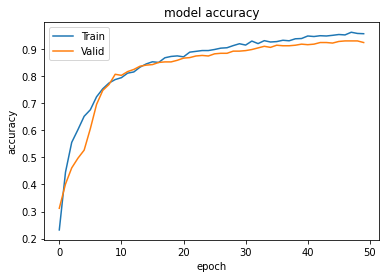

In [11]:
# accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [12]:
# 載入 真．驗證資料
import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/test_images.zip")
f.extractall("./datasets_test/")

In [13]:
for Paths in glob('/content/datasets_test/test_images/*'):
  # fileName
  fileName = Paths.split("/")[-1]

  # 圖片預處理
  img = load_img(Paths)
  img_npm = np.array(img)
  img_pre = preprocess_input(img_npm)
  IMGED = np.array(img_pre)

  # 存檔
  NewPaths = "/content/test_images/test/" + str(fileName)
  cv2.imwrite(NewPaths, IMGED)

In [14]:
TestFlowed = Generator.flow_from_directory(
    directory = "/content/test_images/",
    target_size= (299, 299),
    class_mode= None,
    shuffle= False, 
    )

Found 10142 images belonging to 1 classes.


In [15]:
predict = model.predict(TestFlowed, verbose=1).argmax(axis=-1)

317/317 [==============================] - 59s 187ms/step


In [16]:
# 預言文件

import pandas as pd

result = pd.read_csv("./drive/My Drive/AOI/test.csv")

result["Label"] = list(predict)

In [17]:
# 存檔 上傳Aidea 拿成績
result.to_csv("/content/drive/My Drive/Result.csv", encoding="UTF8", index=False)

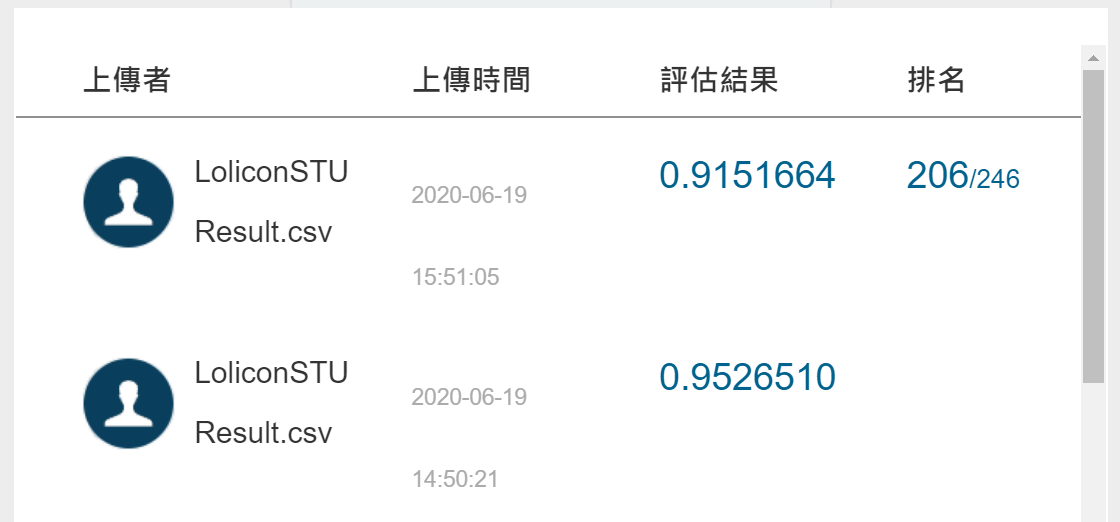

In [19]:
from tensorflow.keras.preprocessing.image import load_img

load_img('/content/drive/My Drive/GG/AA.png')